## 1.
### 1. Simple vs. Multiple Linear Regression
- **Simple Linear Regression**: Models the relationship between one predictor `x` and outcome `y`:

  ```
  y = b0 + b1 * x
  ```

- **Multiple Linear Regression**: Includes multiple predictors `x1, x2, ..., xp`, allowing more factors to be captured:

  ```
  y = b0 + b1 * x1 + b2 * x2 + ... + bp * xp
  ```

### 2. Continuous vs. Indicator Variable in Simple Linear Regression
- **Continuous Variable**: Affects `y` proportionally (e.g., age):

  ```
  y = b0 + b1 * x
  ```

- **Indicator Variable**: Binary (0 or 1), shifts `y` by `b1` if `I(x) = 1`:

  ```
  y = b0 + b1 * I(x)
  ```

### 3. Adding an Indicator in Multiple Regression with a Continuous Variable
Combining a continuous variable `x` and an indicator `I(z)`:

```
y = b0 + b1 * x + b2 * I(z)
```

The indicator shifts the intercept for group differences.

### 4. Interaction Between Continuous and Indicator in Multiple Regression
Adding an interaction term lets the effect of `x` differ by group:

```
y = b0 + b1 * x + b2 * I(z) + b3 * (x * I(z))
```

### 5. Multiple Regression with Only Indicator Variables (Categorical Encoding)
For `k` categories, `k - 1` indicators represent each non-baseline group:

```
y = b0 + b1 * I1 + b2 * I2 + ... + bk-1 * Ik-1
```


## 2.
### Variables
- **Outcome**: `y` (Sales revenue)
- **Predictors**: 
  - `TV_ad_budget` (continuous)
  - `Online_ad_budget` (continuous)

### Linear Forms

1. **Without Interaction** (independent effects):

   ```
   y = b0 + b1 * TV_ad_budget + b2 * Online_ad_budget
   ```

2. **With Interaction** (combined effect):

   ```
   y = b0 + b1 * TV_ad_budget + b2 * Online_ad_budget + b3 * (TV_ad_budget * Online_ad_budget)
   ```

### Prediction Differences

- **Without Interaction**: TV and online ad effects on sales are independent.
- **With Interaction**: Sales effect from one ad type depends on the other.

### Categorical Ad Budgets (High/Low)

1. **Without Interaction**:

   ```
   y = b0 + b1 * High_TV + b2 * High_Online
   ```

2. **With Interaction**:

   ```
   y = b0 + b1 * High_TV + b2 * High_Online + b3 * (High_TV * High_Online)
   ```

With binary budgets, interaction reflects the combined impact of high spending on both ad types.

## 3. https://chatgpt.com/share/67326825-0208-8012-aa72-0ea8304559a1

In [9]:
import pandas as pd
import statsmodels.formula.api as smf

file_path = 'CSCS_data_anon.csv'
data = pd.read_csv(file_path)


/tmp/ipykernel_53/314819347.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [14]:
data = data[['COVID_vaccinated', 'DEMO_age']].dropna()
data['COVID_vaccinated'] = data['COVID_vaccinated'].apply(lambda x: 0 if x == 'No' else 1)

# Define the logistic regression formula
logistic_formula = 'COVID_vaccinated_binary ~ DEMO_age'

# Fit the logistic regression model
log_reg_fit = smf.logit(logistic_formula, data=data_cleaned).fit()
print(log_reg_fit.summary())

Optimization terminated successfully.
         Current function value: 0.380100
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     COVID_vaccinated_binary   No. Observations:                 8101
Model:                               Logit   Df Residuals:                     8099
Method:                                MLE   Df Model:                            1
Date:                     Mon, 11 Nov 2024   Pseudo R-squ.:                 0.01198
Time:                             20:34:02   Log-Likelihood:                -3079.2
converged:                            True   LL-Null:                       -3116.5
Covariance Type:                 nonrobust   LLR p-value:                 5.493e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1848      0.088     13.394      0.000       1.011  

## 4.
1. **Model Fit (17.6% variability):** This low \( R^2 \) indicates that the model only explains a small portion (17.6%) of the total variability in the outcome variable. In other words, while the model is statistically valid, it's not capturing much of the data's overall patterns or trends. This suggests that other factors, not included in the model, may explain most of the variability.

2. **Significant Coefficients:** Even with a low \( R^2 \), some individual predictors can still have a statistically significant impact on the outcome variable. When coefficients are statistically significant, it indicates that these predictors are reliably associated with changes in the outcome variable, even if they do not explain much of its overall variability. This situation can happen if the predictors are each individually impactful but don’t collectively capture the larger structure of the outcome data.

3. **High Coefficients (>10):** The large magnitude of some coefficients implies that changes in those predictors correspond to substantial changes in the predicted outcome. However, large coefficients do not necessarily imply a high \( R^2 \); they only indicate that these predictors have a considerable effect on the outcome variable individually.


## 5. https://chatgpt.com/share/67327030-000c-8012-8edd-5706e24f3fef

In [51]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokemon = pd.read_csv(url) 
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [52]:
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokemon.fillna('None', inplace=True)

np.random.seed(130)
pokemon_train,pokemon_test = \
  train_test_split(pokemon, train_size=fifty_fifty_split_size)
pokemon_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


This cell splits all the pokeamans in half randomly, a group for training, a group for testing.

In [53]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokemon_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:55:51   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This cell creates a linear regression model to predict the HP variable using the Attack and Defense predictors from pokeaman_train.

In [9]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokemon_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


- yhat_model3 holds the predictions of HP for the test set (pokeaman_test) based on the fitted Model 3.
- 'In sample' R-squared measures the model’s performance on training data.
- 'Out of sample' R-squared is calculated as the squared correlation between actual and predicted values on pokeaman_test, indicating how well the model generalizes.

In [54]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokemon_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        03:56:01   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

- Model 4 includes interactions between several predictors, expanding the linear model to account for combinations of Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk.
- Q is used to handle column names with special characters or spaces, like Sp. Def and Sp. Atk.

In [55]:
yhat_model4 = model4_fit.predict(pokemon_test)
y = pokemon_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


- Both 'In sample' and 'Out of sample' R-squared values are printed, assessing Model 4's performance on training and test sets, which only works for the samples but not the ones out of the samples.

## 6. https://chatgpt.com/share/6732736c-3604-8012-9ee3-f0f6fc0369a6

In [12]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        02:19:02   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:56:23   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [58]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


### Design Matrix and Multicollinearity

The design matrix contains all predictor variables used in a model. Complex models have more columns due to additional interactions and transformations, increasing the risk of multicollinearity.

**Multicollinearity** occurs when predictor variables are highly correlated with each other. This can result in issues for the model's generalizability because it means that changes in one predictor variable are often accompanied by changes in another. The model has a harder time isolating the effect of each predictor on the outcome, leading to high sensitivity to variations in the data.

### Condition Number and Multicollinearity

The condition number is a diagnostic metric for multicollinearity: the higher it is, the more multicollinearity exists in the design matrix. Even after centering and scaling, which reduces multicollinearity, `model4` has an extremely high condition number, indicating that its design matrix is still multicollinear.

### Generalizability Issues Due to Multicollinearity

When two predictor variables (or multiple predictors) are highly correlated:
1. **Parameter Estimation**: The model struggles to determine unique contributions from each predictor, leading to inflated coefficient estimates.
2. **Overfitting**: The model can “learn” noise specific to the training data, capturing random associations rather than real patterns. This reduces the model’s ability to generalize to new data (test data).

In `model4`, the extensive interactions and transformations increase complexity, leading to high multicollinearity and a poor condition number. This complexity causes the model to overfit, meaning it captures spurious patterns that appear in the training set but fail to generalize to the test set.

In contrast, simpler models like `model3` have fewer predictors, resulting in a design matrix with less multicollinearity and a low condition number. As a result, `model3` captures more robust patterns that are likely to appear in new data, which improves generalizability.

## 7. https://chatgpt.com/share/6732736c-3604-8012-9ee3-f0f6fc0369a6

In [59]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     5.137
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.52e-15
Time:                        03:56:32   Log-Likelihood:                -875.12
No. Observations:                 215   AIC:                             1840.
Df Residuals:                     170   BIC:                             1992.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     20.6950     12.859      1.609      0.109      -4.689      46.079
Legendary[T.True]              2.3142      5.166      0.448      0.655      -7.884      12.512
C(Generation)[T.2]             0.9000      4.358      0.207      0.837      -7.703       9.503
C(Generation)[T.3]            -5.6112      4.314     -1.301      0.195     -14.127       2.905
C(Generation)[T.4]            -2.0720      4.814     -0.430      0.667     -11.574       7.430
C(Generation)[T.5]             4.5405      4.809      0.944      0.346      -4.952      14.033
C(Generation)[T.6]            -1.5386      5.044     -0.305      0.761     -11.495       8.418
C(Q("Type 1"))[T.Dark]         0.6951      6.272      0.111      0.912     -11.686      13.076
C(Q("Type 1"))[T.Dragon]       6.4911      6.499      0.999      0.319      -6.338      19.320
C(Q("Type 1"))[T.Electric]   -14.1772      7.063     -2.007      0.046     -28.121      -0.234
C(Q("Type 1"))[T.Fairy]       -0.8651     12.790     -0.068      0.946     -26.113      24.383
C(Q("Type 1"))[T.Fighting]    12.4984      9.410      1.328      0.186      -6.077      31.074
C(Q("Type 1"))[T.Fire]         2.7071      6.551      0.413      0.680     -10.224      15.638
C(Q("Type 1"))[T.Flying]    3.453e-15   1.46e-14      0.236      0.814   -2.54e-14    3.23e-14
C(Q("Type 1"))[T.Ghost]        6.1437      7.104      0.865      0.388      -7.879      20.167
C(Q("Type 1"))[T.Grass]        2.0175      5.378      0.375      0.708      -8.599      12.634
C(Q("Type 1"))[T.Ground]      12.1435      7.127      1.704      0.090      -1.925      26.212
C(Q("Type 1"))[T.Ice]         12.2680      8.571      1.431      0.154      -4.651      29.187
C(Q("Type 1"))[T.Normal]      15.2387      5.302      2.874      0.005       4.772      25.706
C(Q("Type 1"))[T.Poison]       9.1067      8.167      1.115      0.266      -7.015      25.228
C(Q("Type 1"))[T.Psychic]     -7.7324      6.898     -1.121      0.264     -21.350       5.885
C(Q("Type 1"))[T.Rock]        -5.3583      5.696     -0.941      0.348     -16.601       5.885
C(Q("Type 1"))[T.Steel]       -0.1309      7.421     -0.018      0.986     -14.779      14.518
C(Q("Type 1"))[T.Water]       12.0803      4.932      2.449      0.015       2.344      21.816
C(Q("Type 2"))[T.Dark]         4.2371     11.988      0.353      0.724     -19.428      27.902
C(Q("Type 2"))[T.Dragon]      10.4596     11.657      0.897      0.371     -12.552      33.471
C(Q("Type 2"))[T.Electric]    12.2134     13.753      0.888      0.376     -14.935      39.362
C(Q("Type 2"))[T.Fairy]        4.8724     11.392      0.428      0.669     -17.617      27.361
C(Q("Type 2"))[T.Fighting]     2.7456     10.920      0.251      0.802     -18.810      24.301
C(Q("Type 2"))[T.Fire]        -3.7372     1

In [60]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.5707287600056383
'Out of sample' R-squared: nan


In [61]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        03:56:35   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [63]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        03:56:38   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [64]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [65]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [66]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


### Developing Model 5 from Models 3 and 4
**Principle:** Simplify without omitting important predictors.

- Model 5 builds on Model 3 by adding more predictors and discarding the complex interactions of Model 4, both to avoid excessive multicollinearity and to include important features that capture main effects. Maintains predictive power by including main effects of correlated predictors without the high condition numbers of Model 4.

### Extending Model 6 from Model 5
**Principle:** Focus on significant variables.

- This model trims down the predictors from model5, retaining only those that significantly impact the response variable. Indicators like  `Types` and `Generations` that showed significance in model5 are incorporated directly, which simplifies the model further and improves interpretability by removing redundant predictors. It creates a more focused, interpretable model that captures key predictors with reduced multicollinearity, improving generalizability and predictive performance.

### Extending Model 7 from Model 6
**Principle:** Introduce interactions between key predictors to capture complex relationships.

- This model builds upon model6 by introducing interactions among the main predictors (`Attack`, `Speed`, `Sp. Def`, and `Sp. Atk`). This allows model7 to capture non-linear interactions that could improve predictive accuracy. Additionally, indicator variables from model6 are retained, focusing on significant types and generations.
- Centering and Scaling: In model7, continuous predictors are centered and scaled to reduce multicollinearity, resulting in a manageable condition number that supports model stability and interpretability of interactions.
- Balanced the complexity with stability by using interactions and centering/scaling, allowing the model to capture more nuanced relationships without risking overfitting.

## 8. https://chatgpt.com/share/6732736c-3604-8012-9ee3-f0f6fc0369a6

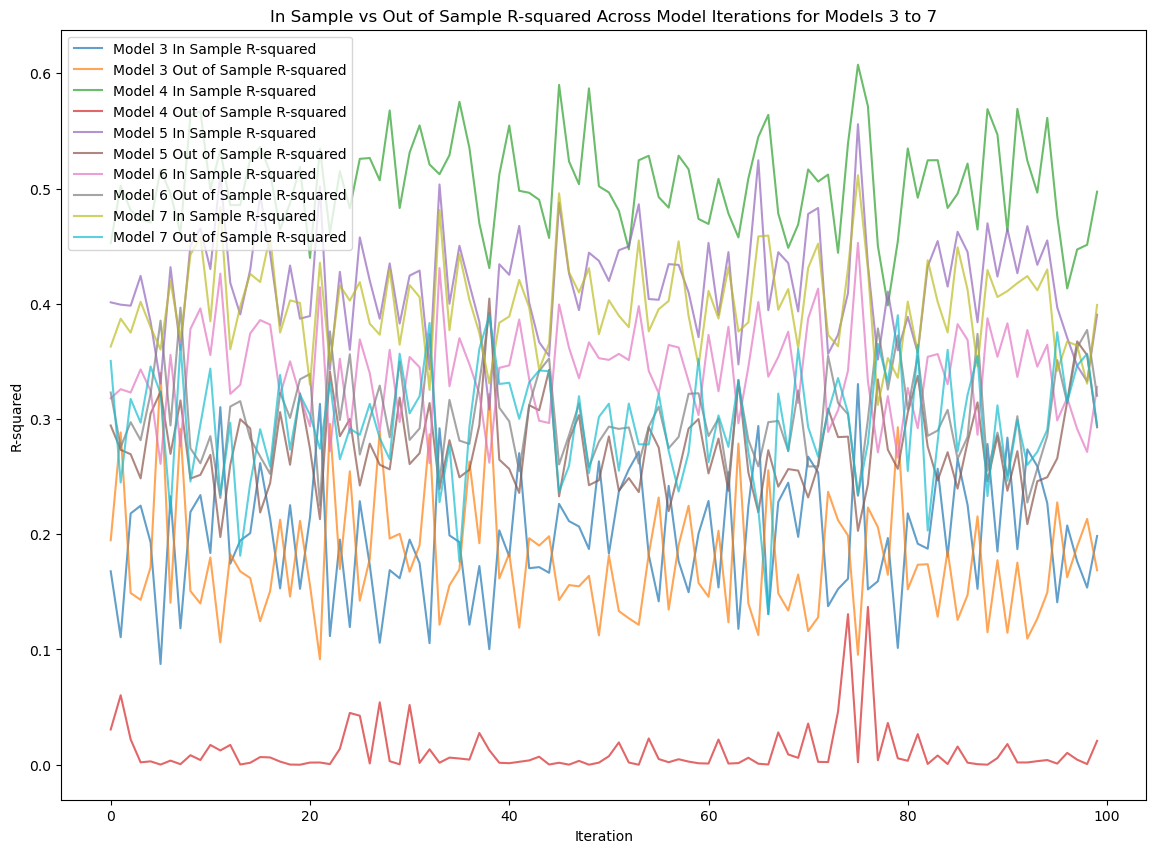

In [67]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'pokeaman' dataset exists with categorical columns 'Type 1', 'Type 2', and 'Generation'

# Set categorical levels based on the full dataset
pokemon['Type 1'] = pd.Categorical(pokemon['Type 1'], categories=pokemon['Type 1'].unique())
pokemon['Type 2'] = pd.Categorical(pokemon['Type 2'], categories=pokemon['Type 2'].unique())
pokemon['Generation'] = pd.Categorical(pokemon['Generation'], categories=pokemon['Generation'].unique())

# Initialize lists to store "in sample" and "out of sample" R-squared values for each model
in_sample_scores = {3: [], 4: [], 5: [], 6: [], 7: []}
out_of_sample_scores = {3: [], 4: [], 5: [], 6: [], 7: []}

# Number of iterations for different model fits
num_iterations = 100

# Define model formulas
model_formulas = {
    3: 'HP ~ scale(center(Attack)) + scale(center(Defense))',
    4: 'HP ~ scale(center(Attack)) * scale(center(Defense)) * scale(center(Speed)) * Legendary * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))',
    5: 'HP ~ Attack + Defense + Speed + Legendary + Q("Sp. Def") + Q("Sp. Atk") + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))',
    6: 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk") + I(Q("Type 1")=="Normal") + I(Q("Type 1")=="Water") + I(Generation==2) + I(Generation==5)',
    7: 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk") + I(Q("Type 1")=="Normal") + I(Q("Type 1")=="Water") + I(Generation==2) + I(Generation==5)'
}

# Run multiple iterations to gather performance metrics
for i in range(num_iterations):
    # Generate a new training and testing set for each iteration
    pokemon_train,pokemon_test = \
    train_test_split(pokemon, train_size=fifty_fifty_split_size)

    # Ensure categorical variables in the train and test sets have the same levels
    pokemon_train['Type 1'] = pokemon_train['Type 1'].cat.set_categories(pokemon['Type 1'].cat.categories)
    pokemon_train['Type 2'] = pokemon_train['Type 2'].cat.set_categories(pokemon['Type 2'].cat.categories)
    pokemon_train['Generation'] = pokemon_train['Generation'].cat.set_categories(pokemon['Generation'].cat.categories)
    
    pokemon_test['Type 1'] = pokemon_test['Type 1'].cat.set_categories(pokemon['Type 1'].cat.categories)
    pokemon_test['Type 2'] = pokemon_test['Type 2'].cat.set_categories(pokemon['Type 2'].cat.categories)
    pokemon_test['Generation'] = pokemon_test['Generation'].cat.set_categories(pokemon['Generation'].cat.categories)

    # Loop through each model
    for model_num, formula in model_formulas.items():
        # Define and fit the model on the training set
        model_spec = smf.ols(formula=formula, data=pokemon_train)
        model_fit = model_spec.fit()

        # Calculate "in sample" R-squared
        in_sample_scores[model_num].append(model_fit.rsquared)

        # Predict on test set and calculate "out of sample" R-squared
        yhat_test = model_fit.predict(pokemon_test)
        y_test = pokemon_test.HP
        out_of_sample_score = np.corrcoef(y_test, yhat_test)[0, 1]**2
        out_of_sample_scores[model_num].append(out_of_sample_score)

# Visualization
plt.figure(figsize=(14, 10))
for model_num in model_formulas.keys():
    plt.plot(range(num_iterations), in_sample_scores[model_num], label=f'Model {model_num} In Sample R-squared', alpha=0.7)
    plt.plot(range(num_iterations), out_of_sample_scores[model_num], label=f'Model {model_num} Out of Sample R-squared', alpha=0.7)

plt.xlabel("Iteration")
plt.ylabel("R-squared")
plt.legend()
plt.title("In Sample vs Out of Sample R-squared Across Model Iterations for Models 3 to 7")
plt.show()


## 9. https://chatgpt.com/share/6732736c-3604-8012-9ee3-f0f6fc0369a6

In [74]:
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokemon = pd.read_csv(url)

np.random.seed(130)
pokemon_train,pokemon_test = \
  train_test_split(pokemon, train_size=fifty_fifty_split_size)

In [75]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokemon[pokemon.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokemon_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokemon[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokemon[pokemon.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


This cell shows that a model trained from all pokemons could predict the whole dataset well since there in-sample R^2(0.38) is really. close to out of sample R^2(0.35). However, a model trained from only those gen-1 pokemons works very well for all the gen-1 pokemons,R^2 = 5.7, but not for all the pokemons, R^2 = 0.11. It suggests that the model lacks generalizability beyond Generation 1.

In [76]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokemon[pokemon.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokemon_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokemon[pokemon.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokemon[pokemon.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


This setup tests whether a model trained on Generations 1 to 5 generalizes well to a new, unseen generation (Generation 6). A 0.23 out of sample R^2 for Generation 6 would indicate that the model trained on Generations 1 to 5 data captures some general patterns that extend to Generation 6. This approach simulates how well a model trained on past data can predict future data (a common challenge in predictive modeling). It helps reveal if the model is overfitting to the Generations 1 to 5 data or if it has broader applicability.

In [77]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokemon[pokemon.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokemon_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokemon[pokemon.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokemon[pokemon.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In this setup, we used model 6, which ignored the interactions among the main predictors (Attack, Speed, Sp. Def, and Sp. Atk). This would't be able to capture non-linear interactions between the main predictors. And for the model trained by gen-1 pokemon using model 6, we can tell the problem of over fitting by its low out of sample R^2(0.19) comparing to its relatively high in-sample R^2(0.44).

In [78]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokemon[pokemon.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokemon_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokemon[pokemon.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


The R^2 drop from 0.30 to 0.26 in out of sample R^2 for the Gen1to5 model highlights a decrease in generalizability when tested on Generation 6 data. This indicates that the relationships and patterns learned from Generations 1 to 5 don’t fully apply to Generation 6, suggesting potential differences in characteristics between Generation 6 pokemon and earlier generations. However, compare to model 7, model 6 seems to have a higher accuracy in out of sample datasets. This is probably because that model 6 ignored some nonlinear interaction between the main predictors (Attack, Speed, Sp. Def, and Sp. Atk), and the interaction between these predictors are the factor that differs different generations of pokemons.